In [45]:
# World Happiness Report

# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

In [31]:
# Now lets set the genral parameter that set the General Style of the plot: 
sns.set_style('darkgrid')
# Run-time config parameters
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.facecolor']='#CCCCFF'

In [3]:
# Importing the Dataset: 

data = pd.read_csv('D:\\DA\\Data_Analyst_projects\\5)Python_Happiness_Report_Project\\world-happiness-report-2021.csv')

In [4]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
# Selecting the relevant columns we need for the analysis: 

data_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [6]:
# copying the original raw data to newly created dataframe.
data = data[data_columns].copy()

In [11]:
# we'll rename the columns to make it simpler
happy_df = data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruptions'})

In [12]:
happy_df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [13]:
# to find any null values in the columns:
happy_df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Text(0, 0.5, 'GDP per capita')

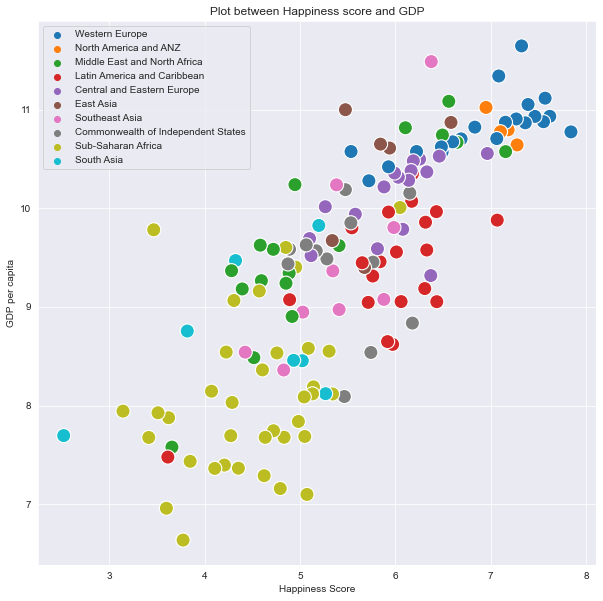

In [60]:
# Plot between Happiness and GDP

plt.rcParams['figure.figsize']=(10,10)
plt.title('Plot between Happiness score and GDP')
sns.scatterplot(x=happy_df['Ladder score'],y=happy_df['Logged GDP per capita'], hue=happy_df['Regional indicator'],s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [25]:
# GDP by region - using pyplot

gdp_region = happy_df.groupby('Regional indicator')['Logged GDP per capita'].sum()
gdp_region

Regional indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged GDP per capita, dtype: float64

Text(0, 0.5, '')

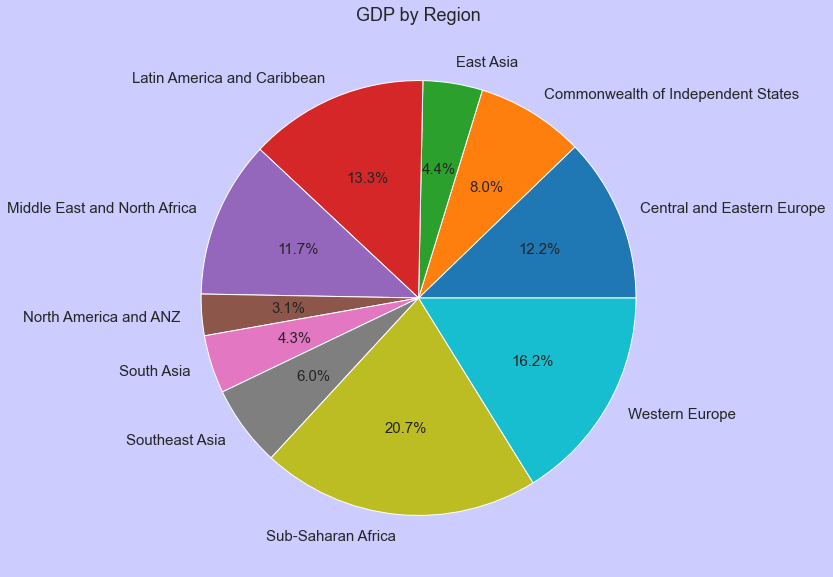

In [33]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')


In [34]:
# Total num of countries in each region: 

total_no_of_country = happy_df.groupby('Regional indicator')[['Country name']].count()
print(total_no_of_country)

                                    Country name
Regional indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


C:\Users\mahad\AppData\Local\Temp\ipykernel_16512\1226472211.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(cor,dtype=np.bool),


<AxesSubplot:>

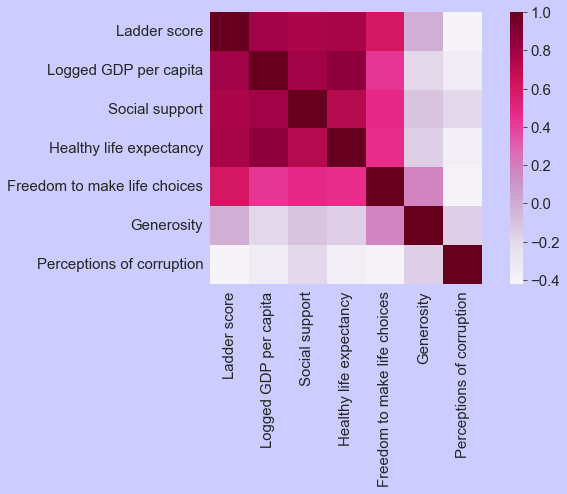

In [36]:
# correlation map:

# Pearson coefficient:
cor = happy_df.corr(method="pearson")

f, ax = plt.subplots(figsize=(10,5))

# Heatmap in seaborn with mask:
sns.heatmap(cor,
            mask=np.zeros_like(cor,dtype=np.bool),
            cmap = "PuRd",
            square=True,
            ax=ax)

In [39]:
# Plotting corruption in different regions:

corruption = happy_df.groupby('Regional indicator')[['Perceptions of corruption']].mean()
corruption

,Perceptions of corruption
Regional indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

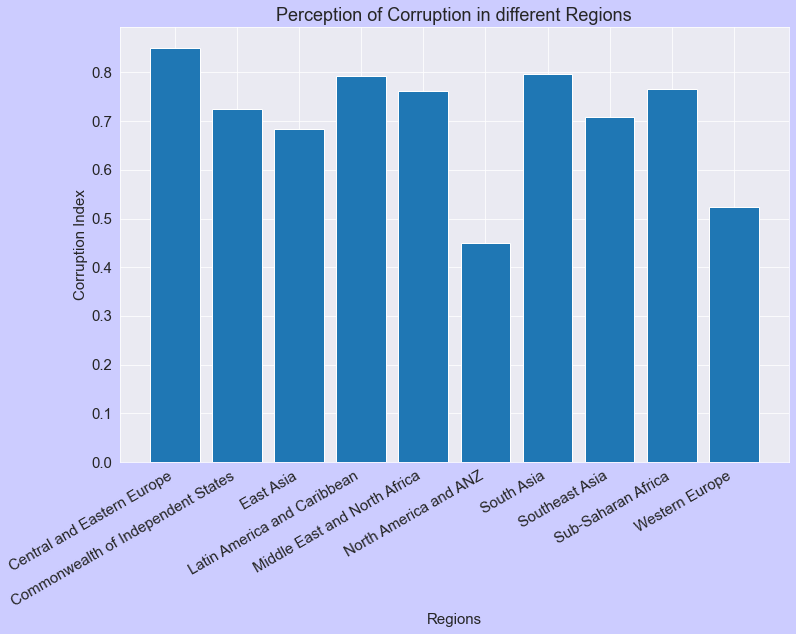

In [40]:
plt.rcParams['figure.figsize']=(12,8)

plt.title('Perception of Corruption in different Regions')
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Corruption Index',fontsize=15)
plt.xticks(rotation=30,ha='right')


plt.bar(corruption.index,corruption['Perceptions of corruption'])

In [42]:
# Life expectancy of Top 10 and Bottom 10 countries:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\mahad\AppData\Local\Temp\ipykernel_16512\2899316809.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\mahad\AppData\Local\Temp\ipykernel_16512\2899316809.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(606.1068181818181, 0.5, 'Life Expectancy')

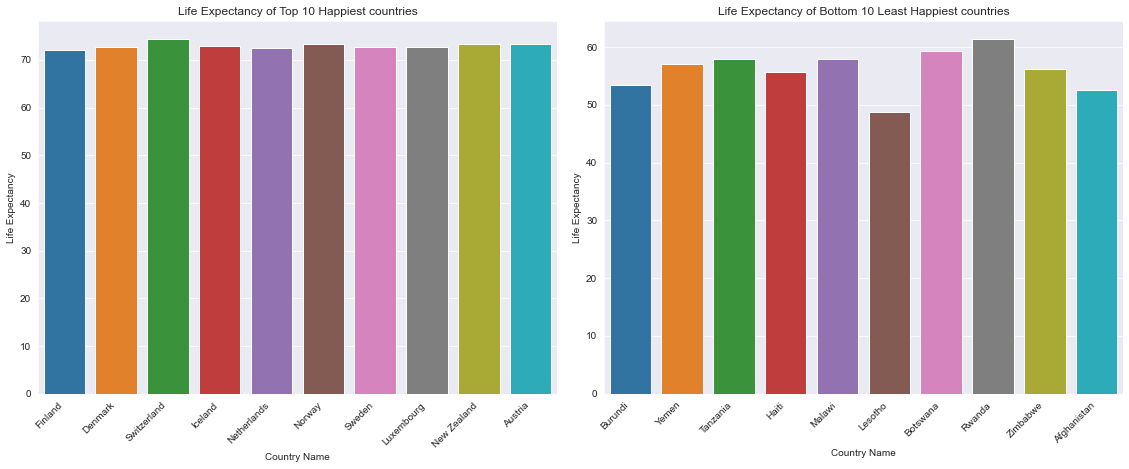

In [46]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)

#top 10 countries: 
xlabels=top_10['Country name']

axes[0].set_title('Life Expectancy of Top 10 Happiest countries')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')

sns.barplot(x=top_10['Country name'], y=top_10['Healthy life expectancy'],ax=axes[0])

axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

# plotting bottom 10 countries:
xlabels=bottom_10['Country name']

axes[1].set_title('Life Expectancy of Bottom 10 Least Happiest countries')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')

sns.barplot(x=bottom_10['Country name'], y=bottom_10['Healthy life expectancy'],ax=axes[1])

axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')


Text(0, 0.5, 'Happiness Score')

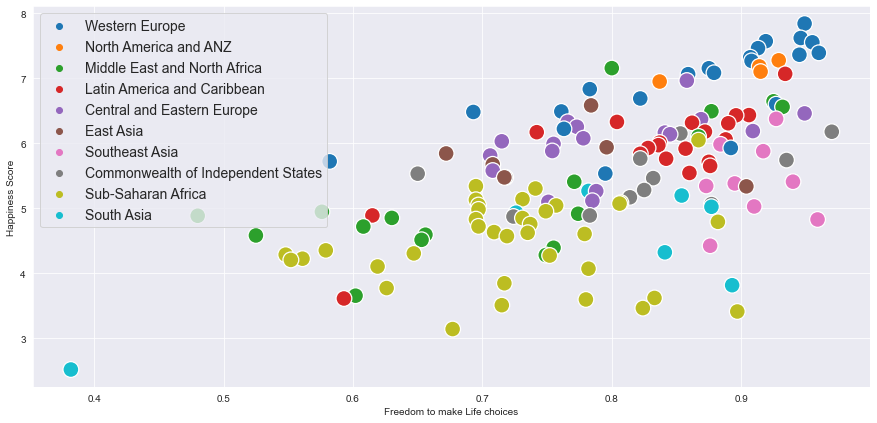

In [61]:
# Plot between Freedom to make life choices and Happiness score

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df['Freedom to make life choices'],y=happy_df['Ladder score'],hue=happy_df['Regional indicator'],s=250)

plt.legend(loc='upper left',fontsize=14)
plt.xlabel('Freedom to make Life choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

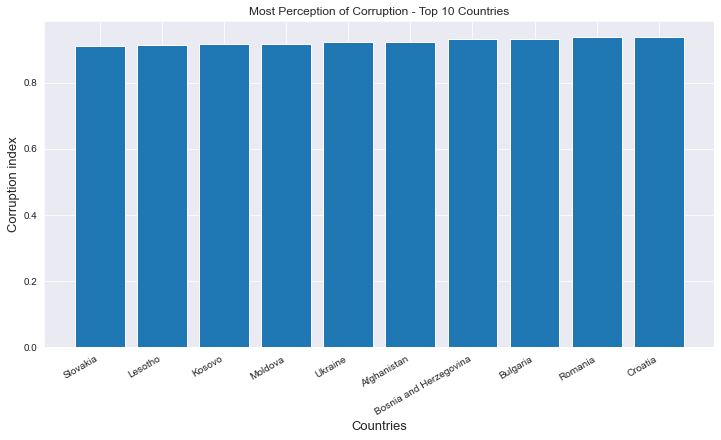

In [54]:
# Top 10 Most Corrupt countries:

country = happy_df.sort_values(by='Perceptions of corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Most Perception of Corruption - Top 10 Countries')
plt.xlabel('Countries',fontsize=13)
plt.ylabel('Corruption index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country['Country name'],country['Perceptions of corruption'])

<BarContainer object of 10 artists>

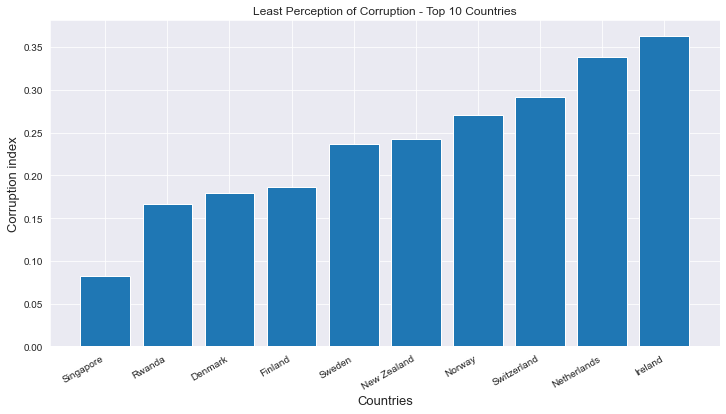

In [55]:
# Top 10 Least Corrupt countries:

country = happy_df.sort_values(by='Perceptions of corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Least Perception of Corruption - Top 10 Countries')
plt.xlabel('Countries',fontsize=13)
plt.ylabel('Corruption index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country['Country name'],country['Perceptions of corruption'])

Text(0, 0.5, 'Corruption')

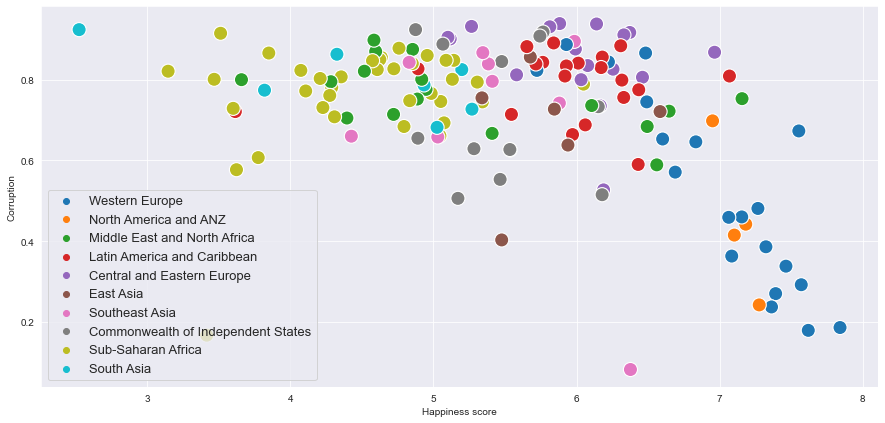

In [63]:
# Visualizing Corruption varies with Happiness score:
# Corruption vs happiness

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df['Ladder score'],y=happy_df['Perceptions of corruption'],hue=happy_df['Regional indicator'],s=200)
plt.legend(loc='lower left',fontsize=13)
plt.xlabel('Happiness score')
plt.ylabel('Corruption')